<a href="https://colab.research.google.com/github/Reachraksh/RAKSHA/blob/main/Sri_Raksha_IPL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [834]:
import pandas as pd

df = pd.read_csv('/content/matches.csv')

df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [835]:
total_matches = df['id'].nunique()
print(f"Total matches played: {total_matches}")


Total matches played: 1095


In [836]:
most_matches_city = df['city'].value_counts().idxmax()
matches_in_city = df['city'].value_counts().max()
print(f"Most matches played in: {most_matches_city} ({matches_in_city} matches)")


Most matches played in: Mumbai (173 matches)


In [837]:
top_venues = df['venue'].value_counts().head(5)
top_venues


,count
venue,
Eden Gardens,77
Wankhede Stadium,73
M Chinnaswamy Stadium,65
Feroz Shah Kotla,60
"Rajiv Gandhi International Stadium, Uppal",49


In [838]:
matches_per_season = df['season'].value_counts().sort_values(ascending=False)
matches_per_season.head()


,count
season,
2013,76
2022,74
2012,74
2023,74
2011,73


In [839]:
super_over_matches = df[df['super_over'] == 'Y'].shape[0]
print(f"Matches with super over: {super_over_matches}")


Matches with super over: 14


In [840]:
df['result'].value_counts()


,count
result,
wickets,578
runs,498
tie,14
no result,5


In [841]:
most_wins_team = df['winner'].value_counts().idxmax()
wins = df['winner'].value_counts().max()
print(f"Most matches won by: {most_wins_team} ({wins} wins)")


Most matches won by: Mumbai Indians (144 wins)


In [842]:
top_player = df['player_of_match'].value_counts().idxmax()
awards = df['player_of_match'].value_counts().max()
print(f"Most Player of the Match awards: {top_player} ({awards} awards)")


Most Player of the Match awards: AB de Villiers (25 awards)


In [843]:

chasing = df[df['result'] == 'wickets'].shape[0]
defending = df[df['result'] == 'runs'].shape[0]
print(f"Matches won by chasing: {chasing}")
print(f"Matches won by defending: {defending}")


Matches won by chasing: 578
Matches won by defending: 498


In [844]:
avg_margin_runs = df[df['result'] == 'runs']['result_margin'].mean()
avg_margin_wickets = df[df['result'] == 'wickets']['result_margin'].mean()
print(f"Average winning margin (runs): {avg_margin_runs:.2f}")
print(f"Average winning margin (wickets): {avg_margin_wickets:.2f}")


Average winning margin (runs): 30.10
Average winning margin (wickets): 6.19


In [845]:
toss_match = df[df['toss_winner'] == df['winner']].shape[0]
total_matches = df.shape[0]
win_percentage = (toss_match / total_matches) * 100
print(f"Matches where toss winner also won the match: {win_percentage:.2f}%")


Matches where toss winner also won the match: 50.59%


In [846]:
win_pct_season = {}

for season, data in df.groupby('season'):
    # Count total matches played by each team
    total_matches = pd.concat([data['team1'], data['team2']]).value_counts()

    # Count wins by each team
    win_counts = data['winner'].value_counts()

    # Calculate win percentage
    win_pct = (win_counts / total_matches * 100).round(2)

    # Store the team with highest win %
    top_team = win_pct.idxmax()
    top_pct = win_pct.max()

    win_pct_season[season] = {'Team': top_team, 'Win %': top_pct}

# Convert to DataFrame
pd.DataFrame(win_pct_season).T



,Team,Win %
2007/08,Rajasthan Royals,81.25
2009,Delhi Daredevils,66.67
2009/10,Mumbai Indians,68.75
2011,Chennai Super Kings,68.75
2012,Kolkata Knight Riders,70.59
2013,Mumbai Indians,68.42
2014,Kings XI Punjab,70.59
2015,Mumbai Indians,62.5
2016,Sunrisers Hyderabad,64.71
2017,Mumbai Indians,70.59


In [847]:
venue_group = df.groupby('venue')['winner'].value_counts().unstack().fillna(0)
best_teams = venue_group.idxmax(axis=1)
best_teams


,0
venue,
Arun Jaitley Stadium,Delhi Capitals
"Arun Jaitley Stadium, Delhi",Delhi Capitals
Barabati Stadium,Deccan Chargers
"Barsapara Cricket Stadium, Guwahati",Punjab Kings
"Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",Lucknow Super Giants
Brabourne Stadium,Mumbai Indians
"Brabourne Stadium, Mumbai",Delhi Capitals
Buffalo Park,Chennai Super Kings
De Beers Diamond Oval,Chennai Super Kings


In [848]:
chasing_df = df[df['result'] == 'wickets']
defending_df = df[df['result'] == 'runs']

venue_chasing = chasing_df['venue'].value_counts()
venue_defending = defending_df['venue'].value_counts()

venue_win_comparison = pd.DataFrame({
    'Chasing Wins': venue_chasing,
    'Defending Wins': venue_defending
}).fillna(0)

venue_win_comparison['Chasing%'] = (venue_win_comparison['Chasing Wins'] /
                                    (venue_win_comparison['Chasing Wins'] + venue_win_comparison['Defending Wins'])) * 100
venue_win_comparison.sort_values(by='Chasing%', ascending=False).head(10)


,Chasing Wins,Defending Wins,Chasing%
venue,,,
Green Park,4.0,0.0,100.000000
Holkar Cricket Stadium,8.0,1.0,88.888889
JSCA International Stadium Complex,5.0,2.0,71.428571
Sawai Mansingh Stadium,32.0,15.0,68.085106
SuperSport Park,8.0,4.0,66.666667
De Beers Diamond Oval,2.0,1.0,66.666667
Shaheed Veer Narayan Singh International Stadium,4.0,2.0,66.666667
Saurashtra Cricket Association Stadium,6.0,3.0,66.666667
Sharjah Cricket Stadium,18.0,10.0,64.285714


<Axes: xlabel='season'>

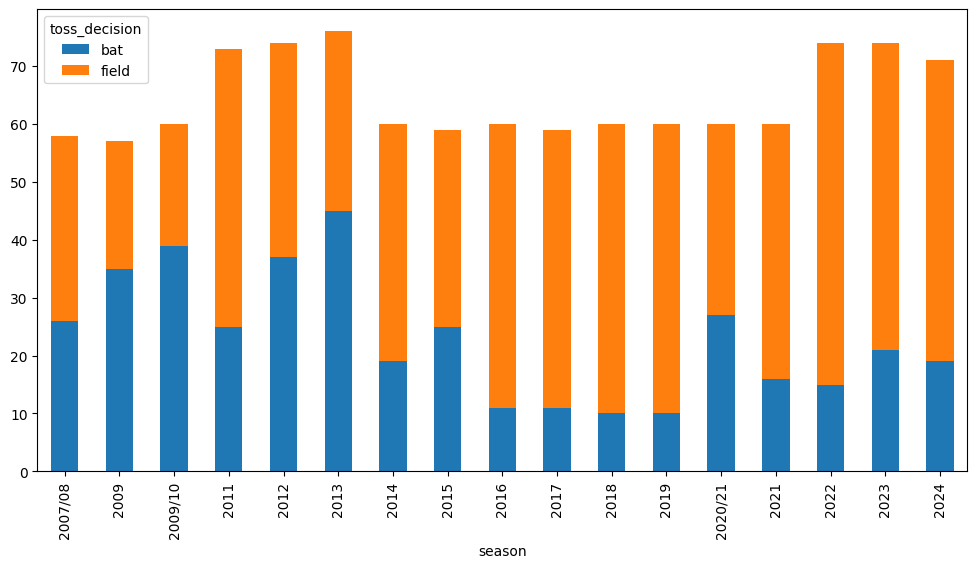

In [849]:
toss_decision_by_season = df.groupby('season')['toss_decision'].value_counts().unstack()
toss_decision_by_season.plot(kind='bar', stacked=True, figsize=(12, 6))


In [850]:
pom_counts = df['player_of_match'].value_counts().head(10)

players = df['player_of_match'].unique()
match_counts = df[df['player_of_match'].isin(players)]['player_of_match'].value_counts()

top_players = pd.DataFrame({
    'Player of Match Awards': pom_counts,
    'Matches (at least one PoM)': match_counts[pom_counts.index]
})
top_players


,Player of Match Awards,Matches (at least one PoM)
player_of_match,,
AB de Villiers,25,25
CH Gayle,22,22
RG Sharma,19,19
V Kohli,18,18
DA Warner,18,18
MS Dhoni,17,17
YK Pathan,16,16
RA Jadeja,16,16
SR Watson,16,16


In [851]:
# Highest by runs
highest_runs = df[df['result'] == 'runs'].sort_values(by='result_margin', ascending=False).head(1)

# Highest by wickets
highest_wickets = df[df['result'] == 'wickets'].sort_values(by='result_margin', ascending=False).head(1)

highest_runs[['id', 'season', 'winner', 'result_margin', 'result']], highest_wickets[['id', 'season', 'winner', 'result_margin', 'result']]


(          id season          winner  result_margin result
 620  1082635   2017  Mumbai Indians          146.0   runs,
         id   season           winner  result_margin   result
 12  335994  2007/08  Deccan Chargers           10.0  wickets)

<Axes: title={'center': 'Super Over Trend'}, xlabel='season'>

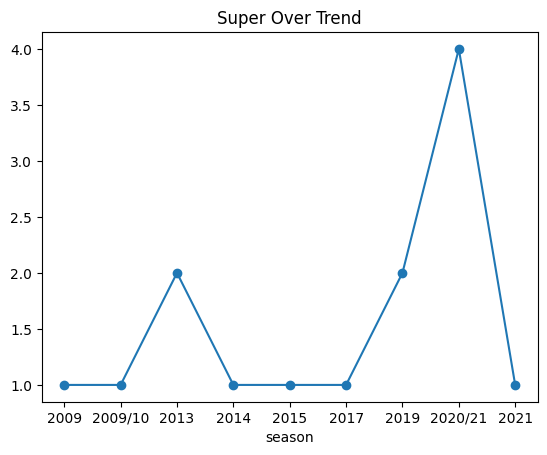

In [852]:
super_over_trend = df[df['super_over'] == 'Y'].groupby('season').size()
super_over_trend.plot(kind='line', marker='o', title='Super Over Trend')


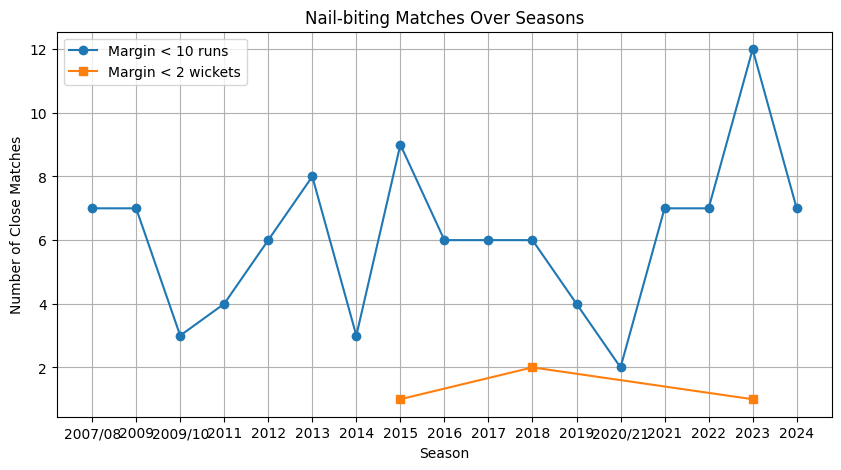

In [853]:
# Close wins by runs
close_by_runs = df[(df['result'] == 'runs') & (df['result_margin'] < 10)]
# Close wins by wickets
close_by_wickets = df[(df['result'] == 'wickets') & (df['result_margin'] < 2)]

close_runs_trend = close_by_runs.groupby('season').size()
close_wickets_trend = close_by_wickets.groupby('season').size()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(close_runs_trend, label='Margin < 10 runs', marker='o')
plt.plot(close_wickets_trend, label='Margin < 2 wickets', marker='s')
plt.title('Nail-biting Matches Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Close Matches')
plt.legend()
plt.grid(True)
plt.show()


<Axes: title={'center': 'Toss Decisions by Month'}, xlabel='month'>

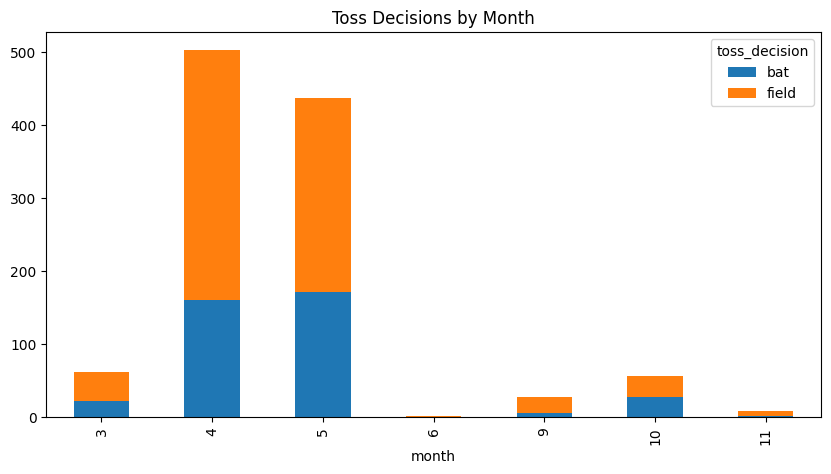

In [854]:
df['month'] = pd.to_datetime(df['date']).dt.month
seasonal_toss = df.groupby('month')['toss_decision'].value_counts().unstack()
seasonal_toss.plot(kind='bar', stacked=True, figsize=(10, 5), title="Toss Decisions by Month")


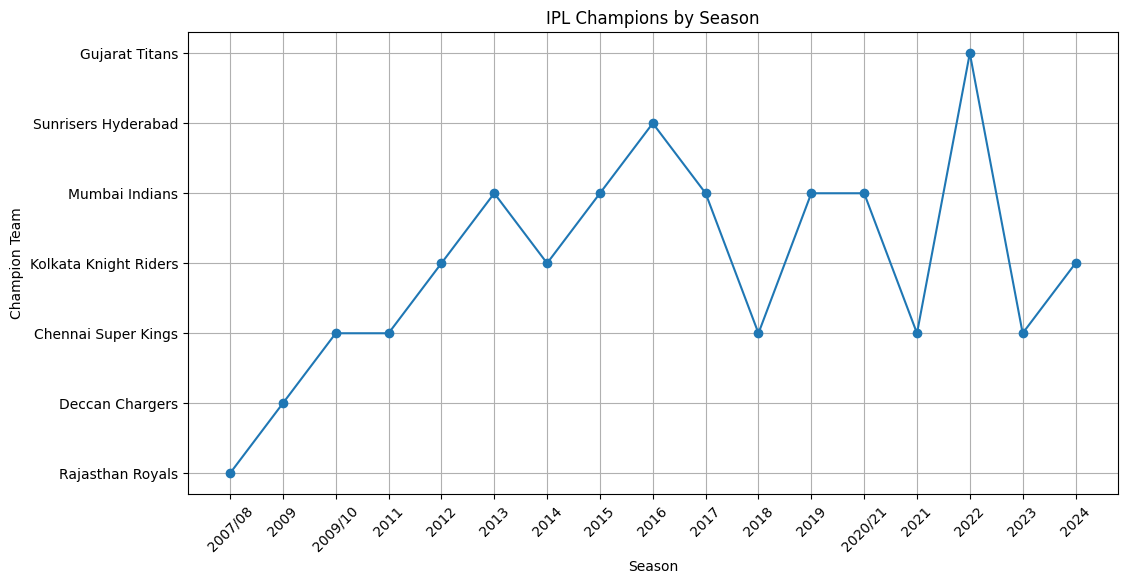

In [855]:
champions = df.sort_values('date').groupby('season').tail(1)
champion_timeline = champions[['season', 'winner']].reset_index(drop=True)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(champion_timeline['season'], champion_timeline['winner'], marker='o')
plt.xticks(champion_timeline['season'], rotation=45)
plt.title('IPL Champions by Season')
plt.xlabel('Season')
plt.ylabel('Champion Team')
plt.grid(True)
plt.show()


<Axes: title={'center': 'Average Target Set Across Seasons'}, xlabel='season'>

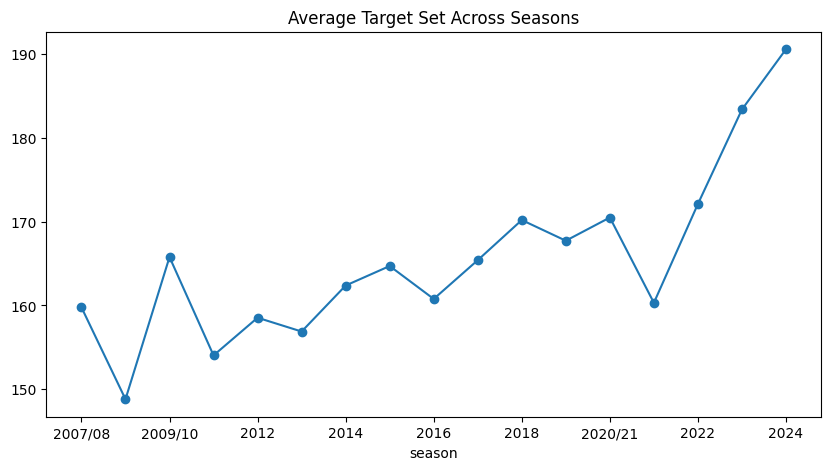

In [856]:
avg_target_by_season = df.groupby('season')['target_runs'].mean().round(2)
avg_target_by_season.plot(marker='o', title='Average Target Set Across Seasons', figsize=(10,5))


<Axes: title={'center': 'Average Overs Taken to Chase Targets'}, xlabel='season'>

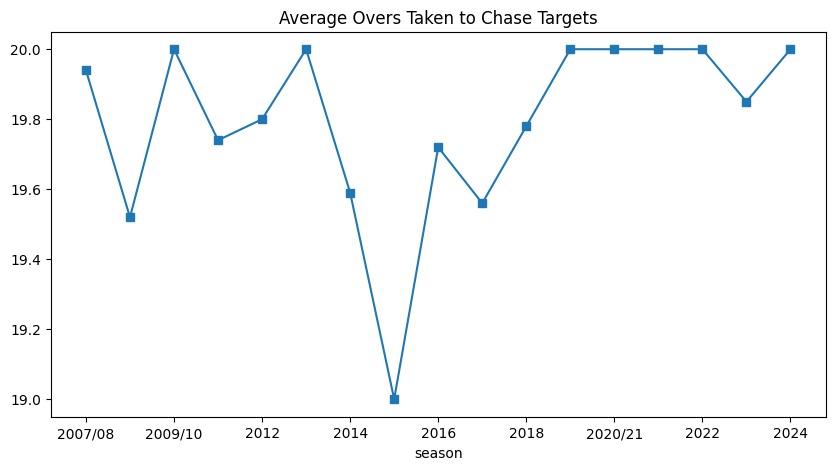

In [857]:
chase_df = df[df['result'] == 'wickets']
avg_overs_to_chase = chase_df.groupby('season')['target_overs'].mean().round(2)
avg_overs_to_chase.plot(marker='s', title='Average Overs Taken to Chase Targets', figsize=(10,5))


In [858]:
from itertools import combinations
from collections import defaultdict

rivalries = defaultdict(lambda: [0, 0])  # [team1 wins, team2 wins]

for _, row in df.iterrows():
    teams = tuple(sorted([row['team1'], row['team2']]))
    if row['winner'] == teams[0]:
        rivalries[teams][0] += 1
    elif row['winner'] == teams[1]:
        rivalries[teams][1] += 1

rivalry_df = pd.DataFrame([
    [k[0], k[1], v[0], v[1], abs(v[0]-v[1]), sum(v)]
    for k, v in rivalries.items()
], columns=['Team1', 'Team2', 'Wins_T1', 'Wins_T2', 'Diff', 'Total'])

close_rivalries = rivalry_df[rivalry_df['Total'] >= 10].sort_values(by='Diff').head(10)
close_rivalries


,Team1,Team2,Wins_T1,Wins_T2,Diff,Total
22,Delhi Daredevils,Mumbai Indians,11,11,0,22
18,Kolkata Knight Riders,Rajasthan Royals,14,14,0,28
26,Mumbai Indians,Rajasthan Royals,15,14,1,29
21,Deccan Chargers,Royal Challengers Bangalore,6,5,1,11
9,Kings XI Punjab,Mumbai Indians,12,14,2,26
12,Deccan Chargers,Mumbai Indians,4,6,2,10
51,Rajasthan Royals,Sunrisers Hyderabad,9,11,2,20
25,Chennai Super Kings,Deccan Chargers,6,4,2,10
24,Kings XI Punjab,Royal Challengers Bangalore,14,12,2,26
46,Royal Challengers Bangalore,Sunrisers Hyderabad,10,12,2,22


In [859]:
venue_pom = df.groupby(['venue', 'player_of_match']).size().reset_index(name='count')
top_performers_per_venue = venue_pom.sort_values(['venue', 'count'], ascending=[True, False]).drop_duplicates('venue')
top_performers_per_venue.head(10)


,venue,player_of_match,count
0,Arun Jaitley Stadium,A Mishra,2
12,"Arun Jaitley Stadium, Delhi",I Sharma,2
25,Barabati Stadium,A Symonds,2
31,"Barsapara Cricket Stadium, Guwahati",NT Ellis,1
40,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,MP Stoinis,2
46,Brabourne Stadium,AM Rahane,1
60,"Brabourne Stadium, Mumbai",Kuldeep Yadav,3
71,Buffalo Park,A Nehra,1
74,De Beers Diamond Oval,DPMD Jayawardene,1
82,Dr DY Patil Sports Academy,DE Bollinger,2


<Axes: title={'center': 'Player of the Match by Role'}, xlabel='role'>

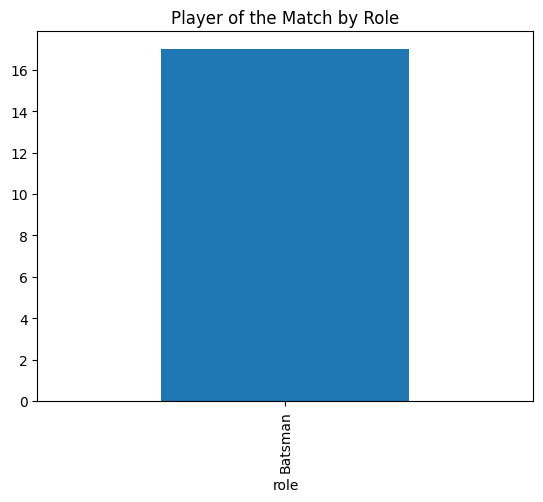

In [860]:
player_roles = {'MS Dhoni': 'Batsman', 'Jasprit Bumrah': 'Bowler'}  # fill fully if available

df['role'] = df['player_of_match'].map(player_roles)
df['role'].value_counts().plot(kind='bar', title='Player of the Match by Role')


In [861]:
venue_stats = df.groupby('venue').agg({
    'result_margin': ['mean'],
    'result': lambda x: (x == 'runs').sum()  # To separate run/wicket-based matches
}).reset_index()

venue_stats.columns = ['venue', 'avg_margin', 'run_win_count']

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
venue_stats['cluster'] = kmeans.fit_predict(venue_stats[['avg_margin', 'run_win_count']])
venue_stats


,venue,avg_margin,run_win_count,cluster
0,Arun Jaitley Stadium,15.307692,7,1
1,"Arun Jaitley Stadium, Delhi",20.812500,9,1
2,Barabati Stadium,13.285714,4,2
3,"Barsapara Cricket Stadium, Guwahati",22.333333,2,1
4,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,20.307692,7,1
5,Brabourne Stadium,16.100000,6,1
6,"Brabourne Stadium, Mumbai",16.705882,8,1
7,Buffalo Park,31.333333,2,0
8,De Beers Diamond Oval,21.000000,1,1
9,Dr DY Patil Sports Academy,15.352941,7,1


<Axes: title={'center': 'Toss Win → Match Win % by Season'}, xlabel='season'>

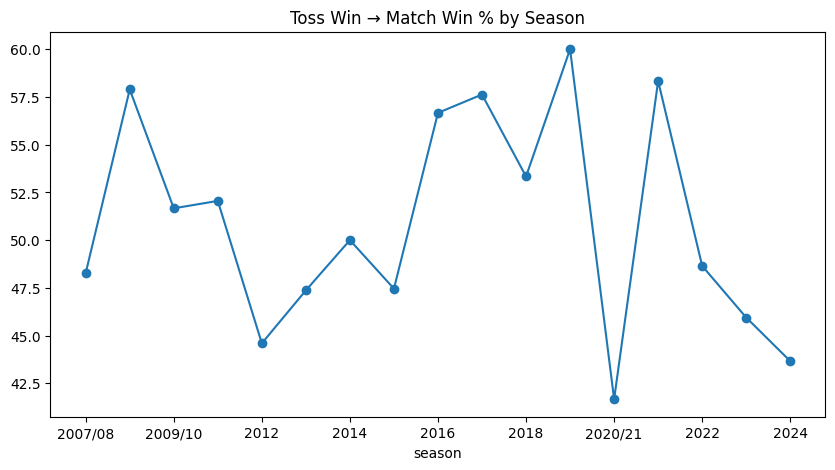

In [862]:
df['toss_win_match_win'] = df['toss_winner'] == df['winner']
toss_effect = df.groupby('season')['toss_win_match_win'].mean() * 100
toss_effect.plot(marker='o', title='Toss Win → Match Win % by Season', figsize=(10,5))


<Axes: title={'center': 'Average Result Margin per Season'}, xlabel='season'>

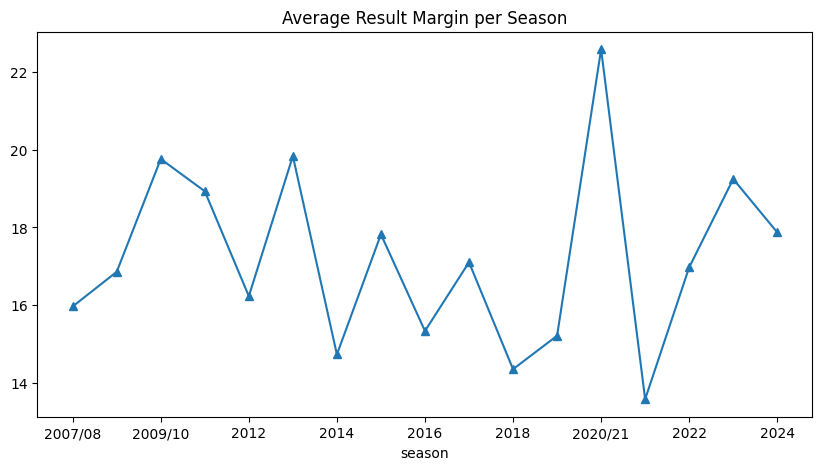

In [863]:
result_margin_trend = df.groupby('season')['result_margin'].mean()
result_margin_trend.plot(marker='^', title='Average Result Margin per Season', figsize=(10,5))


In [864]:
# Super overs per season
super_overs = df[df['super_over'] == 'Y'].groupby('season').size()

# Close wins
close_runs = df[(df['result'] == 'runs') & (df['result_margin'] < 10)].groupby('season').size()
close_wickets = df[(df['result'] == 'wickets') & (df['result_margin'] < 2)].groupby('season').size()

# Combine all
unpredictable = pd.DataFrame({
    'SuperOvers': super_overs,
    'CloseWins(Runs)': close_runs,
    'CloseWins(Wickets)': close_wickets
}).fillna(0)

unpredictable['UnpredictabilityScore'] = unpredictable.sum(axis=1)
unpredictable.sort_values('UnpredictabilityScore', ascending=False).head()


,SuperOvers,CloseWins(Runs),CloseWins(Wickets),UnpredictabilityScore
season,,,,
2023,0.0,12,1.0,13.0
2015,1.0,9,1.0,11.0
2013,2.0,8,0.0,10.0
2018,0.0,6,2.0,8.0
2009,1.0,7,0.0,8.0


In [865]:
home_city_map = {
    'Mumbai Indians': 'Mumbai',
    'Chennai Super Kings': 'Chennai',
    'Kolkata Knight Riders': 'Kolkata',
    'Royal Challengers Bangalore': 'Bangalore',
    'Sunrisers Hyderabad': 'Hyderabad',
    'Delhi Capitals': 'Delhi',
    'Kings XI Punjab': 'Mohali',
    'Rajasthan Royals': 'Jaipur',
}

df['is_home'] = df.apply(lambda x: x['city'] == home_city_map.get(x['winner'], None), axis=1)
home_wins = df.groupby('winner')['is_home'].mean().round(2) * 100
home_wins.sort_values(ascending=False)


,is_home
winner,
Mumbai Indians,44.0
Sunrisers Hyderabad,41.0
Kolkata Knight Riders,40.0
Chennai Super Kings,36.0
Rajasthan Royals,33.0
Royal Challengers Bangalore,25.0
Delhi Capitals,21.0
Deccan Chargers,0.0
Kings XI Punjab,0.0


In [866]:
# Team 1 sets target (>190) but loses
high_target_losses = df[(df['target_runs'] > 190) & (df['winner'] != df['team1'])]

# Team 2 fails chasing <120
low_chase_failures = df[(df['target_runs'] < 120) & (df['winner'] != df['team2'])]

high_target_losses[['season', 'team1', 'team2', 'target_runs', 'winner']]
low_chase_failures[['season', 'team1', 'team2', 'target_runs', 'winner']]


,season,team1,team2,target_runs,winner
4,2007/08,Kolkata Knight Riders,Deccan Chargers,111.0,Kolkata Knight Riders
23,2007/08,Rajasthan Royals,Chennai Super Kings,110.0,Rajasthan Royals
26,2007/08,Mumbai Indians,Rajasthan Royals,104.0,Mumbai Indians
37,2007/08,Mumbai Indians,Kolkata Knight Riders,68.0,Mumbai Indians
56,2007/08,Chennai Super Kings,Kings XI Punjab,113.0,Chennai Super Kings
60,2009,Delhi Daredevils,Kings XI Punjab,54.0,Delhi Daredevils
61,2009,Deccan Chargers,Kolkata Knight Riders,102.0,Deccan Chargers
90,2009,Delhi Daredevils,Mumbai Indians,117.0,Delhi Daredevils
108,2009,Kolkata Knight Riders,Rajasthan Royals,102.0,Kolkata Knight Riders
109,2009,Chennai Super Kings,Kings XI Punjab,117.0,Chennai Super Kings


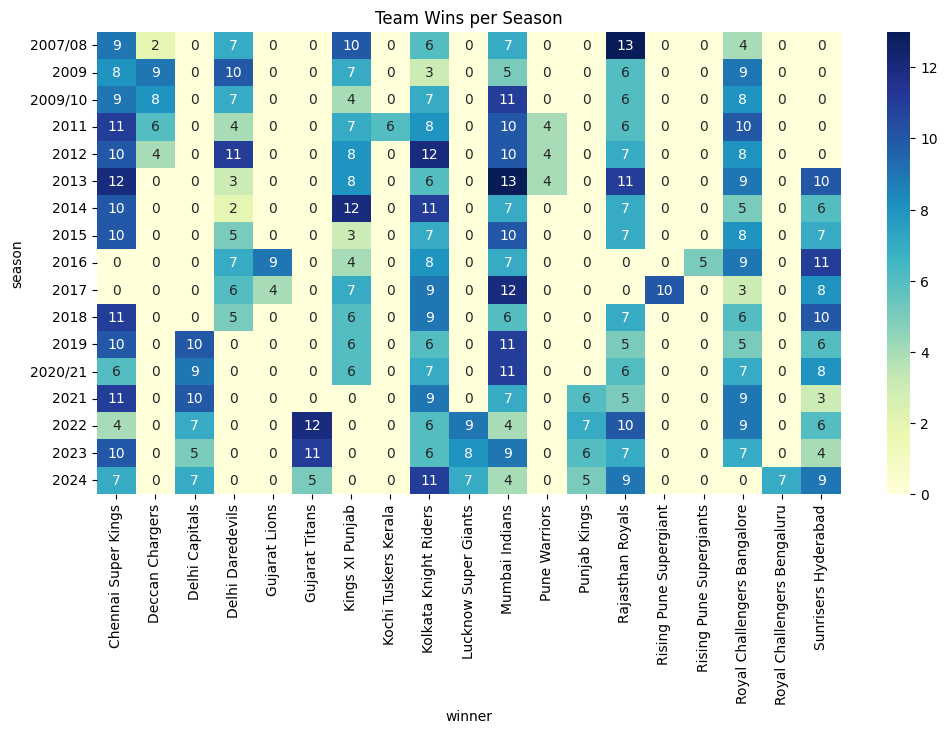

In [867]:
team_yearly = df.groupby(['season', 'winner']).size().unstack(fill_value=0)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(team_yearly, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Team Wins per Season")
plt.show()


In [868]:
playoffs = df.groupby('season').tail(4)  # approx. last 4 matches = playoffs

# Win count in playoffs
playoff_wins = playoffs['winner'].value_counts()

# Regular matches
regular = df[~df.index.isin(playoffs.index)]
regular_wins = regular['winner'].value_counts()

playoff_vs_league = pd.DataFrame({
    'Playoff Wins': playoff_wins,
    'League Wins': regular_wins
}).fillna(0)

playoff_vs_league


,Playoff Wins,League Wins
winner,,
Chennai Super Kings,17.0,121
Deccan Chargers,2.0,27
Delhi Capitals,2.0,46
Delhi Daredevils,0.0,67
Gujarat Lions,0.0,13
Gujarat Titans,3.0,25
Kings XI Punjab,2.0,86
Kochi Tuskers Kerala,0.0,6
Kolkata Knight Riders,10.0,121


In [869]:
# Find which decision usually leads to win
preferred_decision = df.groupby(['toss_winner', 'toss_decision'])['winner'].apply(lambda x: (x == x.index[0]).mean())

# Matches where toss winner lost
chokes = df[df['toss_winner'] != df['winner']]

chokes[['season', 'toss_winner', 'toss_decision', 'winner', 'team1', 'team2']]


,season,toss_winner,toss_decision,winner,team1,team2
0,2007/08,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
2,2007/08,Rajasthan Royals,bat,Delhi Daredevils,Delhi Daredevils,Rajasthan Royals
3,2007/08,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
4,2007/08,Deccan Chargers,bat,Kolkata Knight Riders,Kolkata Knight Riders,Deccan Chargers
5,2007/08,Kings XI Punjab,bat,Rajasthan Royals,Rajasthan Royals,Kings XI Punjab
...,...,...,...,...,...,...
1089,2024,Chennai Super Kings,field,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Chennai Super Kings
1090,2024,Punjab Kings,bat,Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad
1091,2024,Sunrisers Hyderabad,bat,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders
1093,2024,Rajasthan Royals,field,Sunrisers Hyderabad,Sunrisers Hyderabad,Rajasthan Royals


In [870]:
pom_scores = df.groupby('player_of_match').agg({
    'result_margin': 'mean',
    'player_of_match': 'count'
}).rename(columns={'player_of_match': 'PoM_Count'})

pom_scores['Impact_Score'] = (pom_scores['PoM_Count'] * pom_scores['result_margin']).round(2)
top_pom_scores = pom_scores.sort_values(by='Impact_Score', ascending=False).head(10)
top_pom_scores


,result_margin,PoM_Count,Impact_Score
player_of_match,,,
AB de Villiers,25.833333,25,645.83
CH Gayle,26.727273,22,588.00
MS Dhoni,23.647059,17,402.00
SK Raina,25.714286,14,360.00
RG Sharma,18.578947,19,353.00
AM Rahane,26.923077,13,350.00
V Kohli,19.176471,18,345.18
SR Tendulkar,41.500000,8,332.00
SP Narine,21.800000,15,327.00


In [871]:
df['is_home_win'] = df.apply(lambda x: x['city'] == home_city_map.get(x['winner'], None), axis=1)
venue_home_advantage = df.groupby('venue')['is_home_win'].mean().sort_values(ascending=False).round(2) * 100
venue_home_advantage.head(10)


,is_home_win
venue,
MA Chidambaram Stadium,78.0
"MA Chidambaram Stadium, Chepauk",69.0
Sawai Mansingh Stadium,68.0
Rajiv Gandhi International Stadium,67.0
Eden Gardens,58.0
Wankhede Stadium,58.0
"Sawai Mansingh Stadium, Jaipur",50.0
Brabourne Stadium,50.0
"Rajiv Gandhi International Stadium, Uppal, Hyderabad",46.0


In [872]:
matchup = pd.crosstab(df['team1'], df['team2'])
# Or create win-loss matrix
win_matrix = pd.crosstab(df['winner'], df['team2'])
win_pct_matrix = (win_matrix.T / win_matrix.T.sum()).T.fillna(0).round(2) * 100
win_pct_matrix.head()


team2,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
winner,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,46.0,3.0,3.0,5.0,0.0,1.0,5.0,1.0,7.0,1.0,7.0,1.0,1.0,8.0,0.0,0.0,7.0,0.0,4.0
Deccan Chargers,3.0,55.0,0.0,3.0,0.0,0.0,3.0,0.0,7.0,0.0,7.0,3.0,0.0,7.0,0.0,0.0,10.0,0.0,0.0
Delhi Capitals,4.0,0.0,52.0,0.0,0.0,4.0,2.0,0.0,4.0,2.0,4.0,0.0,4.0,8.0,0.0,0.0,4.0,0.0,10.0
Delhi Daredevils,4.0,3.0,0.0,43.0,1.0,0.0,9.0,0.0,9.0,0.0,13.0,1.0,0.0,7.0,1.0,0.0,3.0,0.0,3.0
Gujarat Lions,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,8.0,8.0,8.0,0.0,0.0


In [873]:
# Wins per season
wins = df.groupby(['season', 'winner']).size().unstack(fill_value=0)

# Avg margin per winner
avg_margin = df.groupby('winner')['result_margin'].mean()

# Calculate dominance per team
dominance = wins.copy()
for team in dominance.columns:
    dominance[team] = dominance[team] + avg_margin.get(team, 0)

dominant_teams = dominance.T.idxmax(axis=1)
dominant_scores = dominance.T.max(axis=1).round(2)

pd.DataFrame({'Most Dominant Team': dominant_teams, 'Score': dominant_scores})


,Most Dominant Team,Score
winner,,
Chennai Super Kings,2013,32.91
Deccan Chargers,2009,26.00
Delhi Capitals,2019,24.22
Delhi Daredevils,2012,25.18
Gujarat Lions,2016,14.08
Gujarat Titans,2022,28.93
Kings XI Punjab,2014,27.56
Kochi Tuskers Kerala,2011,14.83
Kolkata Knight Riders,2012,29.58
